<div class="alert alert-block alert-warning">
<b>Exercise 0:</b> Create a new folder and notebook called <b>Intro-Data-Analysis-Pandas-Exercises</b> where you will perform all the exercises below. Make sure to copy any code you need from this notebook to that one. You will use that folder to create a new GitHub repo with the code, html, and slides as usual.
</div>

In [1]:
import pandas as pd

<div class="alert alert-block alert-warning">
<b>Exercise 1:</b> Create a new dataframe <code>pop</code> with population data downloaded from <a href="https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)">Wikipedia</a>. Make sure to clean the data so it can be used further.
</div>

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'
population = pd.read_html(url, encoding='utf-8')[0]
population

,Country / Area,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
...,...,...,...,...,...,...
229,Falkland Islands (United Kingdom),Americas,South America,3234,3377,+4.42%
230,Niue,Oceania,Polynesia,1620,1615,−0.31%
231,Tokelau (New Zealand),Oceania,Polynesia,1319,1340,+1.59%
232,Vatican City[z],Europe,Southern Europe,801,799,−0.25%


In [3]:
population.columns = ['Country/Area', 'Continent', 'Sub-region', 'Population_2018',
                      'Population_2019', 'Change']
population.head()

,Country/Area,Continent,Sub-region,Population_2018,Population_2019,Change
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%


<div class="alert alert-block alert-warning">
<b>Exercise 2:</b> Merge the <code>isocodes</code> and <code>pop</code> dataframes.
</div>

In [4]:
from IPython.display import IFrame
url = 'https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes'

isocodes = pd.read_html(url, encoding='utf-8')[0]
isocodes

isocodes = isocodes.droplevel(0, axis=1)
isocodes.head()

mycols = isocodes.columns
mycols = [c[:c.find('[')] for c in mycols]
mycols

isocodes.columns = mycols
isocodes.head()

isocodes['Alpha-2 code original'] = isocodes['Alpha-2 code']
isocodes['Alpha-2 code'] = isocodes['Subdivision code links'].apply(lambda x: x[x.find(':')+1:])
isocodes.head()

isocodes = isocodes.drop(columns = (["Official state name", "Sovereignty", "Alpha-2 code", "Numeric code", "Subdivision code links", "Internet ccTLD", "Alpha-2 code original"]))

In [5]:
merged = isocodes.merge(population, left_on='Country name', right_on='Country/Area')
merged

,Country name,Alpha-3 code,Country/Area,Continent,Sub-region,Population_2018,Population_2019,Change
0,Afghanistan,AFG,Afghanistan,Asia,Southern Asia,37171921,38041754,+2.34%
1,Albania,ALB,Albania,Europe,Southern Europe,2882740,2880917,−0.06%
2,Algeria,DZA,Algeria,Africa,Northern Africa,42228408,43053054,+1.95%
3,Andorra,AND,Andorra,Europe,Southern Europe,77006,77142,+0.18%
4,Angola,AGO,Angola,Africa,Middle Africa,30809787,31825295,+3.30%
...,...,...,...,...,...,...,...,...
139,Uzbekistan,UZB,Uzbekistan,Asia,Central Asia,32476244,32981716,+1.56%
140,Vanuatu,VUT,Vanuatu,Oceania,Melanesia,292680,299882,+2.46%
141,Yemen,YEM,Yemen,Asia,Western Asia,28498683,29161922,+2.33%
142,Zambia,ZMB,Zambia,Africa,Eastern Africa,17351708,17861030,+2.94%


<div class="alert alert-block alert-warning">
<b>Exercise 3:</b> Merge the dataframes we have created so far to have a unique dataframe that has ISO codes, GDP per capita, and population data.
</div>

In [6]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita'
IFrame(url, width=800, height=400)

gdppc_wiki = pd.read_html(url, encoding='utf-8')[1]
gdppc_wiki

gdppc_wiki.columns = ['Country/Territory', 'UN Region', 'gdppc_IMF', 'year_IMF',
                      'gdppc_WB', 'year_WB', 'gdppc_CIA', 'year_CIA']
gdppc_wiki.head()

gdppc_wiki['country_name'] = gdppc_wiki['Country/Territory'].str.replace('*', '', regex=True).str.strip()

for c in gdppc_wiki.columns[2:-1]:
    if gdppc_wiki[c].dtype=='O':
        gdppc_wiki[c] = pd.to_numeric(gdppc_wiki[c].str.replace('Ã¢Â€Â”', 'nan'), errors='coerce')
        if c.startswith('year'):
            gdppc_wiki[c] = gdppc_wiki[c].astype('Int64')
gdppc_wiki.head()

,Country/Territory,UN Region,gdppc_IMF,year_IMF,gdppc_WB,year_WB,gdppc_CIA,year_CIA,country_name
0,Luxembourg *,Europe,141587.0,2022,134754.0,2021,110300,2020,Luxembourg
1,Liechtenstein *,Europe,NaN,<NA>,NaN,<NA>,139100,2009,Liechtenstein
2,Singapore *,Asia,131426.0,2022,116487.0,2021,93400,2020,Singapore
3,Ireland *,Europe,131034.0,2022,106456.0,2021,89700,2020,Ireland
4,Monaco *,Europe,NaN,<NA>,NaN,<NA>,115700,2015,Monaco


In [7]:
merged = merged.merge(gdppc_wiki, left_on='Country name', right_on='country_name')
merged

,Country name,Alpha-3 code,Country/Area,Continent,Sub-region,Population_2018,Population_2019,Change,Country/Territory,UN Region,gdppc_IMF,year_IMF,gdppc_WB,year_WB,gdppc_CIA,year_CIA,country_name
0,Afghanistan,AFG,Afghanistan,Asia,Southern Asia,37171921,38041754,+2.34%,Afghanistan *,Asia,2456.0,2020,2079.0,2020,2000,2020,Afghanistan
1,Albania,ALB,Albania,Europe,Southern Europe,2882740,2880917,−0.06%,Albania *,Europe,17858.0,2022,15646.0,2021,13300,2020,Albania
2,Algeria,DZA,Algeria,Africa,Northern Africa,42228408,43053054,+1.95%,Algeria *,Africa,13324.0,2022,12038.0,2021,10700,2020,Algeria
3,Andorra,AND,Andorra,Europe,Southern Europe,77006,77142,+0.18%,Andorra *,Europe,65372.0,2022,NaN,<NA>,49900,2015,Andorra
4,Angola,AGO,Angola,Africa,Middle Africa,30809787,31825295,+3.30%,Angola *,Africa,7455.0,2022,6581.0,2021,6200,2020,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Uzbekistan,UZB,Uzbekistan,Asia,Central Asia,32476244,32981716,+1.56%,Uzbekistan *,Asia,9478.0,2022,8497.0,2021,7000,2020,Uzbekistan
140,Vanuatu,VUT,Vanuatu,Oceania,Melanesia,292680,299882,+2.46%,Vanuatu *,Oceania,2858.0,2022,3105.0,2021,2800,2020,Vanuatu
141,Yemen,YEM,Yemen,Asia,Western Asia,28498683,29161922,+2.33%,Yemen *,Asia,2136.0,2022,3689.0,2013,2500,2017,Yemen
142,Zambia,ZMB,Zambia,Africa,Eastern Africa,17351708,17861030,+2.94%,Zambia *,Africa,3808.0,2022,3624.0,2021,3300,2020,Zambia


<div class="alert alert-block alert-warning">
<b>Exercise 4:</b> Use the <code>os</code> package to create folders to export data and figures. 
Since you will be using the names of these folders a lot, save their names in variables called <code>path</code>, <code>pathout</code>, and <code>pathgraphs</code>, where <code>path = './data/'</code>, <code>pathout = './data/'</code>, and <code>pathgraphs = './graphs/'</code>
</div>

In [8]:
import os

path = './data/'
pathout = './data/'
pathgraphs = './graphs/'

try: 
    os.mkdir(path) 
except OSError as error: 
    print("Folder already exists.")

try: 
    os.mkdir(pathgraphs) 
except OSError as error: 
    print("Folder already exists.")

Folder already exists.


<div class="alert alert-block alert-warning">
    <b>Exercise 5:</b> Save the dataframe created in Exercise 3 as a <b>CSV, XLSX, and Stata</b> file into the <code>pathout</code> folder. Use a variable called <code>filename = 'Wiki_Data'</code> so you can use similar code to save all file types. Notice only the filetype will change.
</div>

In [9]:
merged.to_csv('./data/Wiki_Data', sep='\t')

<div class="alert alert-block alert-warning">
<b>Exercise 6:</b> Create plots showing the relation between GDP per capita and Population. Create all 4 types of possible regression plots and save them as <b> PNG, PDF, and JPG</b> files. Make sure to save them in the folder you created for <b>graphs</b>
</div>

NameError: name 'plt' is not defined

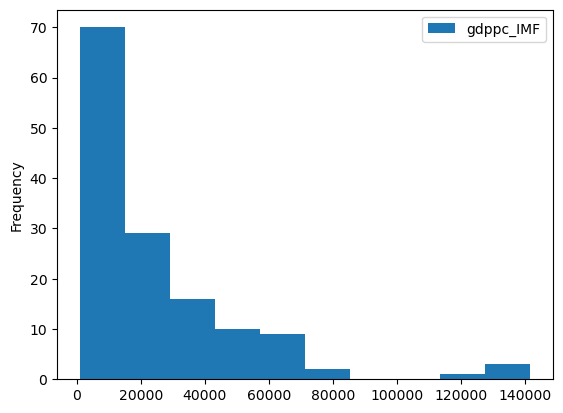

In [10]:
merged.plot( x='Population_2019', y='gdppc_IMF', kind='hist')
plt.savefig("./graphs/output1.png")

NameError: name 'plt' is not defined

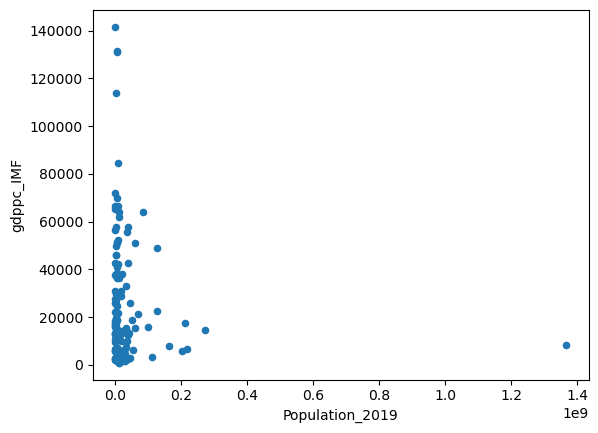

In [11]:
merged.plot( x='Population_2019', y='gdppc_IMF', kind='scatter')
plt.savefig("./graphs/output2.png")

NameError: name 'plt' is not defined

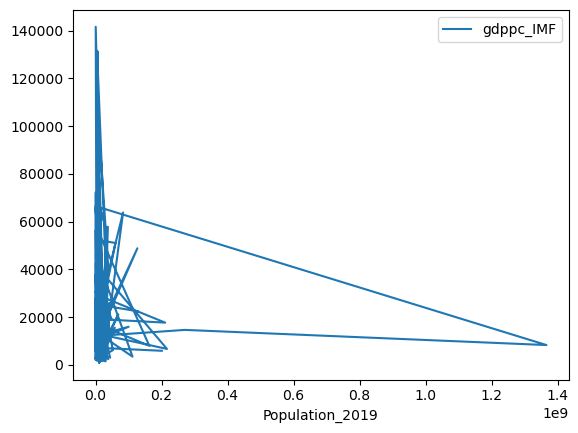

In [12]:
merged.plot( x='Population_2019', y='gdppc_IMF', kind='line')
plt.savefig("./graphs/output3.png")

<AxesSubplot:ylabel='Density'>

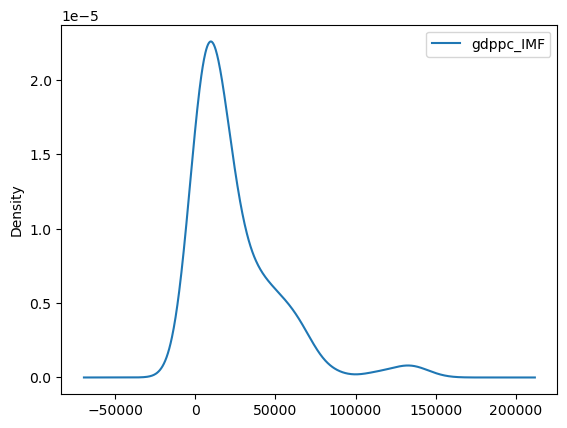

In [13]:
merged.plot( x='Population_2019', y='gdppc_IMF', kind='kde')